In [5]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\Users\Itika\anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\Itika\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\Itika\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\Itika\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [6]:
def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `file.txt` (0.42 kB)


In [7]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    frequencies={}
    file_contents=file_contents.split()
    str1=""
    
    for word in file_contents:
        str1=''.join(ch for ch in word if ch.isalnum())
        if str1.lower() not in uninteresting_words:
            
            if str1.lower() not in frequencies:
                frequencies[str1.lower()]=1
            else:
                frequencies[str1.lower()]+=1
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

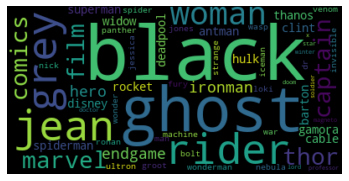

In [9]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'bilinear')
plt.axis('off')
plt.show()

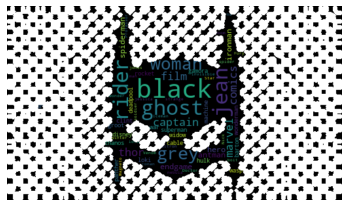

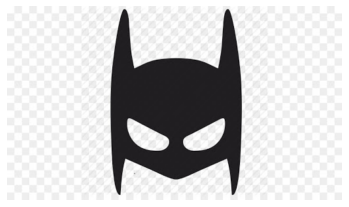

In [20]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'C:\\Users\\Itika\\Downloads\\file.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "C:\\Users\\Itika\\Downloads\\unnamed.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="black", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=10, contour_color='white')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "unnamed.jpg"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

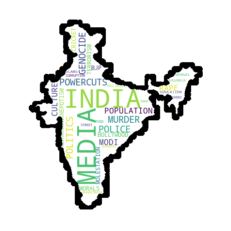

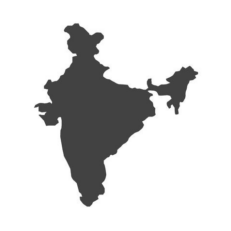

In [24]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'C:\\Users\\Itika\\Downloads\\file2.txt')).read()

# read the mask image
# taken from
mask1 = np.array(Image.open(path.join(d, "C:\\Users\\Itika\\Downloads\\India.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=mask1,
               stopwords=stopwords, contour_width=10, contour_color='black')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "India.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask1, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()